<a href="https://colab.research.google.com/github/AarnavNoble/MNIST-Digit-Classification/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# used to make the plots appear automatically without having using plt to show
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

# used to have constant results all the time (avoids randomness)
np.random.seed(0)

# Data

In [ ]:
from keras.datasets import mnist
# basically just downloads the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# lines that prints out the dimensions of the data by accessing it using '.shape'
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize Examples

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


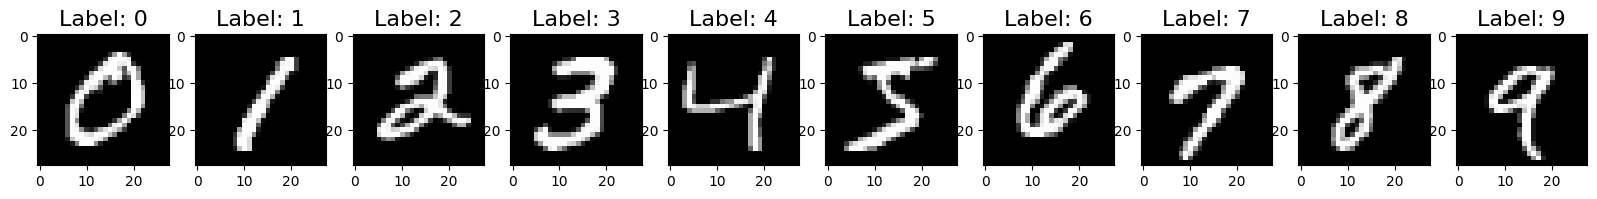

In [ ]:
num_classes = 10

# 1 row, 10 columns, 20x20 figure size
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray') # displays image, with the image being gray
  ax[i].set_title("Label: {}".format(i), fontsize=16) # adds label

# one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# code labels
for i in range(10):
  print(y_train[i])

# Prepare Data

In [ ]:
# normalizing data
# dividing by 255 because pure white is 255 and black is 0. As such, every number will be within the range 0 to 1
x_train = x_train / 255.0
x_test = x_test /255.0

# reshape data
# reshapes the size of the array, x_train.shape[0] is specifies the new size of the first dimension, -1 allows it to be as big a size as needed
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Fully Connected Neural Network Model

In [ ]:
# enables you to add layers one by one
model = Sequential()

# adds first layer to model, dense = fully connected, 128 neurons in each layer, layer should have a shape of 784,
model.add(Dense(units = 128, input_shape = (784,), activation = 'relu'))
# adds another layer
model.add(Dense(units = 128, activation = 'relu'))
# regularization technique that prevents overfitting, giving accurate predictions for training data but not for new data
model.add(Dropout(0.25))
# adds the output layer, 10 output classes and softmax which is often used in multi-class classification problems
model.add(Dense(units = 10, activation = 'softmax'))
# compiles the model, cat_cross used often when dealing with multiple classes
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# prints model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training Stage

In [ ]:
# sets the number of samples processed per iteration
batch_size = 512
# epochs represent the number of complete pass throughs of the training data set
epochs = 10
# trains the data. x represents the input data. y represents the target data
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 5s 19ms/step - loss: 0.5803 - accuracy: 0.8302
Epoch 2/10
118/118 [==============================] - 2s 19ms/step - loss: 0.2178 - accuracy: 0.9362
Epoch 3/10
118/118 [==============================] - 3s 22ms/step - loss: 0.1602 - accuracy: 0.9528
Epoch 4/10
118/118 [==============================] - 3s 27ms/step - loss: 0.1276 - accuracy: 0.9627
Epoch 5/10
118/118 [==============================] - 3s 24ms/step - loss: 0.1040 - accuracy: 0.9690
Epoch 6/10
118/118 [==============================] - 3s 21ms/step - loss: 0.0903 - accuracy: 0.9733
Epoch 7/10
118/118 [==============================] - 2s 18ms/step - loss: 0.0776 - accuracy: 0.9771
Epoch 8/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0662 - accuracy: 0.9805
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0589 - accuracy: 0.9826
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0509 - accura

# Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9764
Test Loss: 0.07377549260854721, Test Accuracy: 0.9764000177383423


In [ ]:
# provides the model's confidence score for each class
y_pred = model.predict(x_test)
# uses the argmax function to find the index with the highest predicted probability for each sample
# axis = 1 essentially converts probabilities into class labels
y_pred_classes = np.argmax(y_pred, axis = 1)
# provides the model's confidence score for each class
y_pred = model.predict(x_test)
# uses the argmax function to find the index with the highest predicted probability for each sample
# axis = 1 essentially converts probabilities into class labels
y_pred_classes = np.argmax(y_pred, axis = 1)

313/313 [==============================] - 1s 2ms/step


# Single Example

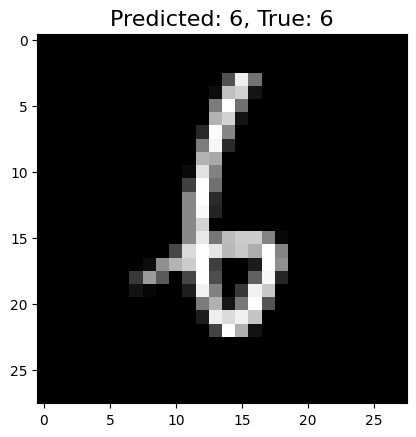

In [ ]:
# generate a random index
random_idx = np.random.choice(len(x_test))
# select a random sample from the random index found previously
x_sample = x_test[random_idx]
# covert the labels into class indices, which y_true will now contain
y_true = np.argmax(y_test, axis = 1)
# extract the true class label from previous sample
y_sample_true = y_true[random_idx]
# extract the predicted class label
y_sample_pred_class = y_pred_classes[random_idx]

# print predicted and true labels for the random sample
plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
# display image
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')

# Confusion Matrix Visual

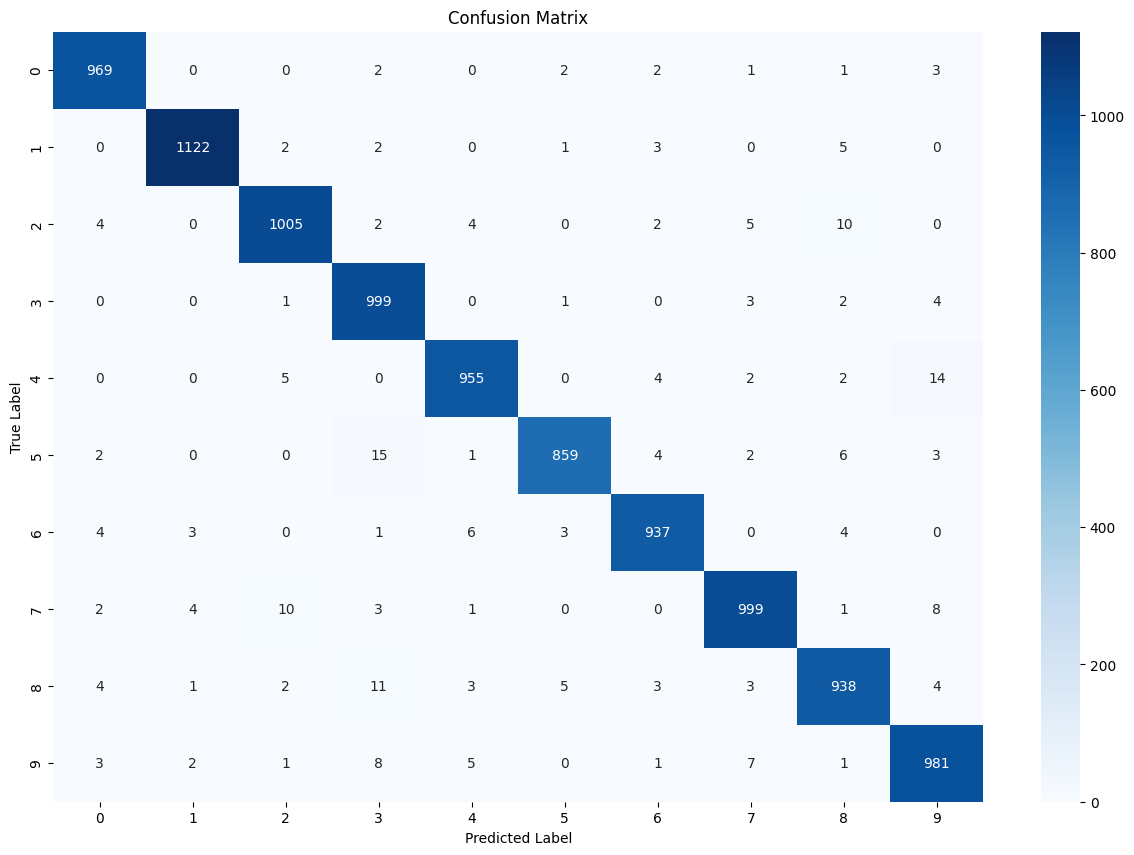

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the matrix
figure, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');